
    Problem Statement No. 01 
Consider the “Academic performance” dataset of students (Academic_Performance_Dataset.csv) and perform the 
following operations using Python. 
a) Scan all variables for missing values and inconsistencies. If there are missing values and/or inconsistencies, use any 
of the suitable techniques to deal with them. 
b) Scan all numeric variables for outliers. If there are outliers, use any of the suitable techniques to deal with them. 
c) Apply data transformations on categorical variables to convert it into numerical variables. 
Reason and document your approach prop 
</h4>

In [1]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns

In [2]:
df = pd.read_csv('Academic_Performance.csv')
df.sample(5)

,STUDENT_ID,GENDER,PLACEMENT,HONOR_OPTED_OR_NOT,EDUCATION_TYPE,ACADEMIC_PROGRAM,COURSE 1 MARKS,COURSE 2 MARKS,COURSE 3 MARKS,COURSE 4 MARKS,COURSE 5 MARKS,PERCENTILE,OVEARLL_GRADE
8219,SB11201320239712,M,Yes,No,TECHNICAL/ACADEMIC,INDUSTRIAL ENGINEERING,59.0,33.0,3.0,61.0,59.0,33,DISTINCTION
8605,SB11201320266761,F,Yes,Yes,TECHNICAL/ACADEMIC,INDUSTRIAL ENGINEERING,30.0,12.0,37.0,15.0,4.0,11,FIRST CLASS
5791,SB11201320066634,F,Yes,Yes,TECHNICAL/ACADEMIC,INDUSTRIAL ENGINEERING,94.0,90.0,65.0,51.0,42.0,78,DISTINCTION
5283,SB11201320033775,M,Yes,Yes,ACADEMIC,CIVIL ENGINEERING,93.0,74.0,27.0,27.0,64.0,63,FIRST CLASS
5373,SB11201320038639,M,No,No,ACADEMIC,ELECTRONIC ENGINEERING,99.0,80.0,25.0,92.0,58.0,85,DISTINCTION


In [3]:
df.shape

(12411, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12411 entries, 0 to 12410
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   STUDENT_ID          12411 non-null  object 
 1   GENDER              12389 non-null  object 
 2   PLACEMENT           12396 non-null  object 
 3   HONOR_OPTED_OR_NOT  12397 non-null  object 
 4   EDUCATION_TYPE      12396 non-null  object 
 5   ACADEMIC_PROGRAM    12377 non-null  object 
 6   COURSE 1 MARKS      12400 non-null  float64
 7   COURSE 2 MARKS      12403 non-null  float64
 8   COURSE 3 MARKS      12397 non-null  float64
 9   COURSE 4 MARKS      12397 non-null  float64
 10  COURSE 5 MARKS      12389 non-null  float64
 11  PERCENTILE          12411 non-null  int64  
 12  OVEARLL_GRADE       12411 non-null  object 
dtypes: float64(5), int64(1), object(7)
memory usage: 1.2+ MB


In [5]:
df.isnull().sum()

STUDENT_ID             0
GENDER                22
PLACEMENT             15
HONOR_OPTED_OR_NOT    14
EDUCATION_TYPE        15
ACADEMIC_PROGRAM      34
COURSE 1 MARKS        11
COURSE 2 MARKS         8
COURSE 3 MARKS        14
COURSE 4 MARKS        14
COURSE 5 MARKS        22
PERCENTILE             0
OVEARLL_GRADE          0
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.isnull().sum()

STUDENT_ID            0
GENDER                0
PLACEMENT             0
HONOR_OPTED_OR_NOT    0
EDUCATION_TYPE        0
ACADEMIC_PROGRAM      0
COURSE 1 MARKS        0
COURSE 2 MARKS        0
COURSE 3 MARKS        0
COURSE 4 MARKS        0
COURSE 5 MARKS        0
PERCENTILE            0
OVEARLL_GRADE         0
dtype: int64

In [8]:
df['COURSE 1 MARKS']

0        71.0
1        97.0
2        17.0
3        65.0
4        94.0
         ... 
12405    80.0
12406    88.0
12407    46.0
12408    98.0
12410    83.0
Name: COURSE 1 MARKS, Length: 12268, dtype: float64

<AxesSubplot:xlabel='COURSE 1 MARKS'>

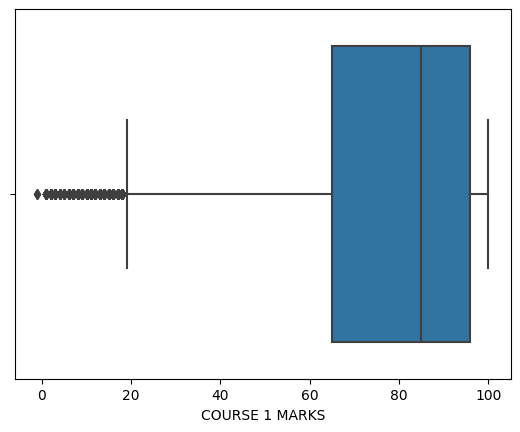

In [9]:
sns.boxplot(x=df['COURSE 1 MARKS'])

In [18]:
df['COURSE 1 MARKS'].describe()

count    12268.000000
mean        77.389224
std         22.714260
min         -1.000000
25%         65.000000
50%         85.000000
75%         96.000000
max        100.000000
Name: COURSE 1 MARKS, dtype: float64

<AxesSubplot:xlabel='COURSE 2 MARKS'>

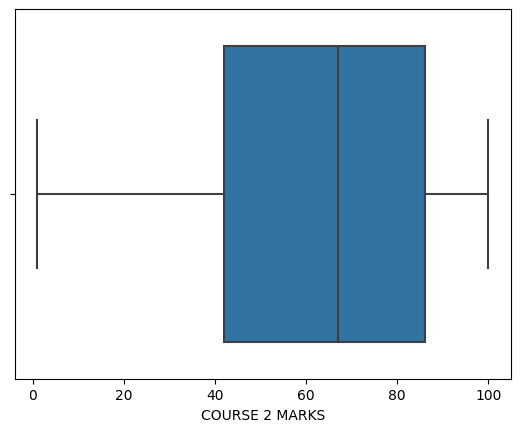

In [19]:
sns.boxplot(x=df['COURSE 2 MARKS'])

<AxesSubplot:xlabel='COURSE 3 MARKS'>

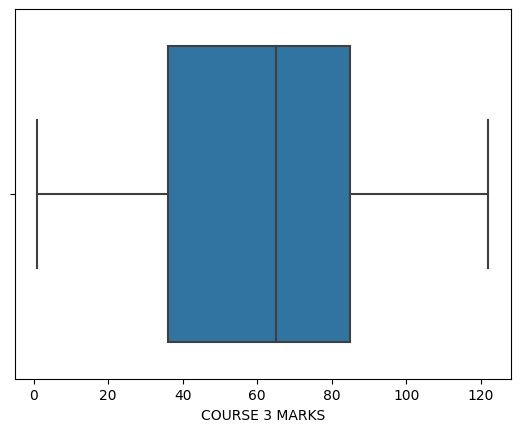

In [20]:
sns.boxplot(x=df['COURSE 3 MARKS'])

<AxesSubplot:xlabel='COURSE 4 MARKS'>

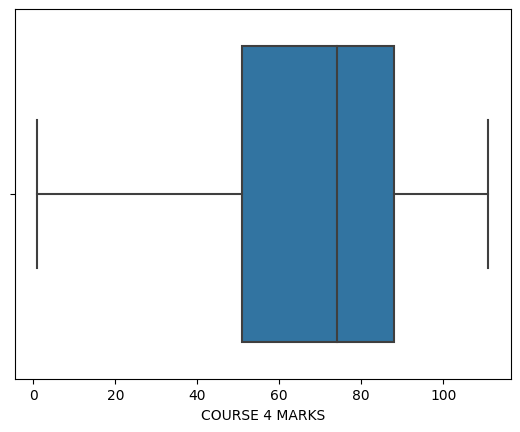

In [12]:
sns.boxplot(x=df['COURSE 4 MARKS'])

<AxesSubplot:xlabel='COURSE 5 MARKS'>

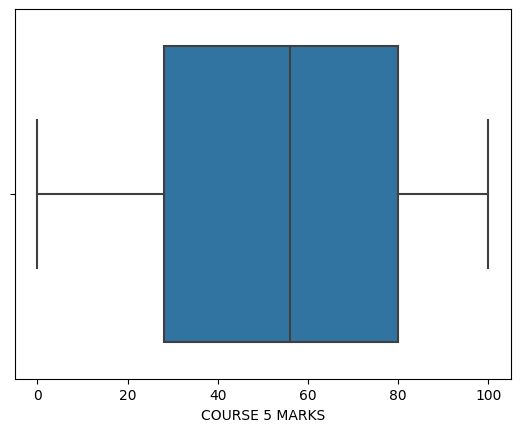

In [13]:
sns.boxplot(x=df['COURSE 5 MARKS'])

<AxesSubplot:>

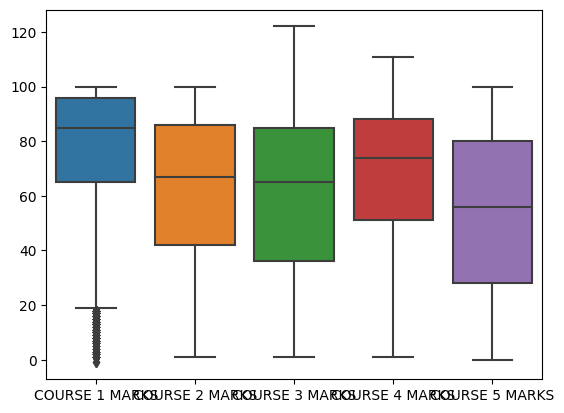

In [17]:
sns.boxplot(df[['COURSE 1 MARKS','COURSE 2 MARKS','COURSE 3 MARKS','COURSE 4 MARKS','COURSE 5 MARKS']])

In [23]:
def remove_outliars(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3-Q1
    upper = Q3 + 1.5*IQR
    lower = Q1 - 1.5*IQR
    return data[(data >= lower) & (data <= upper)]

In [29]:
df['COURSE 1 MARKS'] = remove_outliars(df['COURSE 1 MARKS'])

In [31]:
df['COURSE 1 MARKS'].describe()

count    11976.000000
mean        79.009603
std         20.433903
min         19.000000
25%         67.000000
50%         86.000000
75%         96.000000
max        100.000000
Name: COURSE 1 MARKS, dtype: float64

<AxesSubplot:xlabel='COURSE 1 MARKS'>

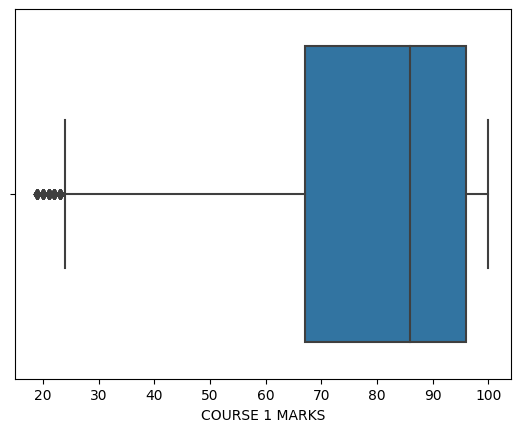

In [33]:
sns.boxplot(x=df['COURSE 1 MARKS'])

In [34]:
df['COURSE 1 MARKS'] = remove_outliars(df['COURSE 1 MARKS'])

<AxesSubplot:xlabel='COURSE 1 MARKS'>

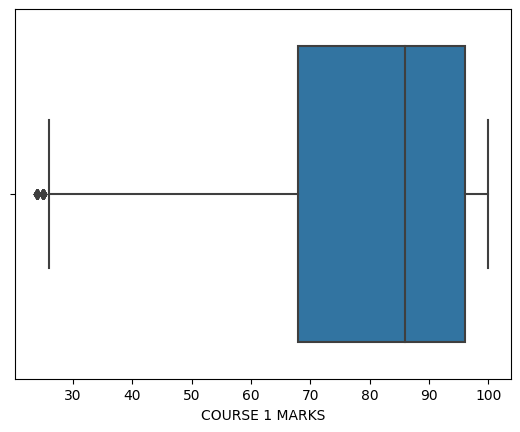

In [35]:
sns.boxplot(x = df['COURSE 1 MARKS'])

In [36]:
df['COURSE 1 MARKS'] = remove_outliars(df['COURSE 1 MARKS'])

<AxesSubplot:xlabel='COURSE 1 MARKS'>

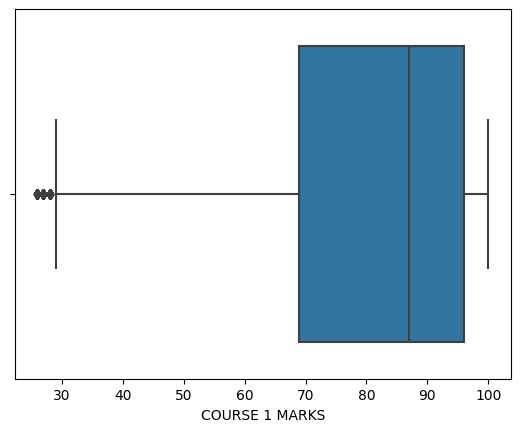

In [37]:
sns.boxplot(x = df['COURSE 1 MARKS'])

<AxesSubplot:>

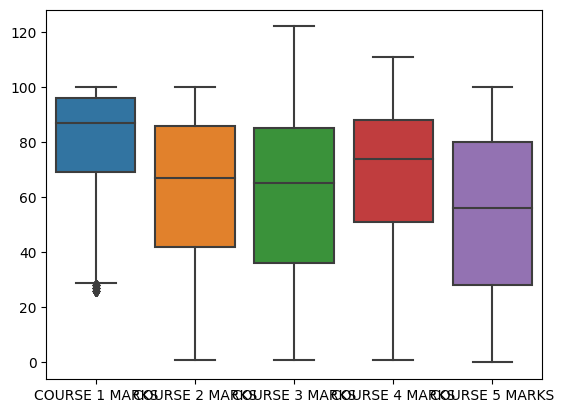

In [38]:
sns.boxplot(df[['COURSE 1 MARKS','COURSE 2 MARKS','COURSE 3 MARKS','COURSE 4 MARKS','COURSE 5 MARKS']])

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12268 entries, 0 to 12410
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   STUDENT_ID          12268 non-null  object 
 1   GENDER              12268 non-null  object 
 2   PLACEMENT           12268 non-null  object 
 3   HONOR_OPTED_OR_NOT  12268 non-null  object 
 4   EDUCATION_TYPE      12268 non-null  object 
 5   ACADEMIC_PROGRAM    12268 non-null  object 
 6   COURSE 1 MARKS      11776 non-null  float64
 7   COURSE 2 MARKS      12268 non-null  float64
 8   COURSE 3 MARKS      12268 non-null  float64
 9   COURSE 4 MARKS      12268 non-null  float64
 10  COURSE 5 MARKS      12268 non-null  float64
 11  PERCENTILE          12268 non-null  int64  
 12  OVEARLL_GRADE       12268 non-null  object 
dtypes: float64(5), int64(1), object(7)
memory usage: 1.3+ MB


In [40]:
df = pd.get_dummies(df , columns=['GENDER','PLACEMENT','HONOR_OPTED_OR_NOT','EDUCATION_TYPE','ACADEMIC_PROGRAM','OVEARLL_GRADE'])

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12268 entries, 0 to 12410
Data columns (total 42 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   STUDENT_ID                                                      12268 non-null  object 
 1   COURSE 1 MARKS                                                  11776 non-null  float64
 2   COURSE 2 MARKS                                                  12268 non-null  float64
 3   COURSE 3 MARKS                                                  12268 non-null  float64
 4   COURSE 4 MARKS                                                  12268 non-null  float64
 5   COURSE 5 MARKS                                                  12268 non-null  float64
 6   PERCENTILE                                                      12268 non-null  int64  
 7   GENDER_F                                              